# Content based recommendation system





## 1. Mount Drive and Change to Current Directory

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd /content/gdrive/My Drive/ml-20m

/content/gdrive/My Drive/ml-20m


In [3]:
!ls

Content_based_recommendation_system.ipynb  links.csv	   soupdata.csv
contentdata.csv				   movies.csv	   tags.csv
data.csv				   ratings.csv	   tagsdata.csv
genome-scores.csv			   README.txt
genome-tags.csv				   simpledata.csv


# 2. Import Required Library

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('whitegrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 3. Load Dataset

In [0]:
ratings = pd.read_csv('ratings.csv', low_memory=False)

In [0]:
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
5,1,112,3.5,1094785740
6,1,151,4.0,1094785734
7,1,223,4.0,1112485573
8,1,253,4.0,1112484940
9,1,260,4.0,1112484826


In [0]:
ratings.shape

(20000263, 4)

In [0]:
tags = pd.read_csv('tags.csv', low_memory=False)

In [0]:
del tags['timestamp']

In [0]:
tags.head(10)

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero
5,65,668,bollywood
6,65,898,screwball comedy
7,65,1248,noir thriller
8,65,1391,mars
9,65,1617,neo-noir


In [0]:
tags = tags.sort_values(by =['movieId', 'userId'])

In [0]:
tags.head(10)

,userId,movieId,tag
3676,1644,1,Watched
4509,1741,1,computer animation
4510,1741,1,Disney animated feature
4511,1741,1,Pixar animation
4512,1741,1,TÃ©a Leoni does not star in this movie
12169,2299,1,Pixar
15772,3596,1,animation
15773,3596,1,family
15774,3596,1,Tom Hanks
25502,6233,1,Pixar


In [0]:
tags.shape

(465564, 3)

In [0]:
movies = pd.read_csv('movies.csv', low_memory=False)

In [0]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [0]:
movies.shape

(27278, 3)

In [0]:
links = pd.read_csv('links.csv', low_memory=False)

In [0]:
links.head(10)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
5,6,113277,949.0
6,7,114319,11860.0
7,8,112302,45325.0
8,9,114576,9091.0
9,10,113189,710.0


In [0]:
gscores = pd.read_csv('genome-scores.csv', low_memory=False)

In [0]:
gscores.head(10)

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675
5,1,6,0.21700
6,1,7,0.06700
7,1,8,0.26275
8,1,9,0.26200
9,1,10,0.03200


In [0]:
gtags = pd.read_csv('genome-tags.csv', low_memory=False)

In [0]:
gtags.head(10)

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
5,6,1950s
6,7,1960s
7,8,1970s
8,9,1980s
9,10,19th century


# 4. Merge Datasets

In [0]:
movies['movieId'] = movies['movieId'].astype('int')
tags['movieId'] = tags['movieId'].astype('int')
ratings['movieId'] = ratings['movieId'].astype('int')
tags['userId'] = tags['userId'].astype('int')
ratings['userId'] = ratings['userId'].astype('int')

In [0]:
data = []
data = ratings.merge(movies, on='movieId')

In [0]:
data.shape

(20000263, 6)

In [0]:
data.head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,851527569,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,849082742,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,835562174,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,846509384,Jumanji (1995),Adventure|Children|Fantasy
5,54,2,3.0,974918176,Jumanji (1995),Adventure|Children|Fantasy
6,88,2,1.0,1098277938,Jumanji (1995),Adventure|Children|Fantasy
7,91,2,3.5,1112061358,Jumanji (1995),Adventure|Children|Fantasy
8,116,2,2.0,1132728068,Jumanji (1995),Adventure|Children|Fantasy
9,119,2,4.0,845110667,Jumanji (1995),Adventure|Children|Fantasy


In [0]:
data = data.combine_first(tags)

In [0]:
data.head(10)

,genres,movieId,rating,tag,timestamp,title,userId
0,Adventure|Children|Fantasy,2,3.5,Mark Waters,1112486027,Jumanji (1995),1
1,Adventure|Children|Fantasy,2,3.0,dark hero,851527569,Jumanji (1995),5
2,Adventure|Children|Fantasy,2,3.0,dark hero,849082742,Jumanji (1995),13
3,Adventure|Children|Fantasy,2,3.0,noir thriller,835562174,Jumanji (1995),29
4,Adventure|Children|Fantasy,2,3.0,dark hero,846509384,Jumanji (1995),34
5,Adventure|Children|Fantasy,2,3.0,bollywood,974918176,Jumanji (1995),54
6,Adventure|Children|Fantasy,2,1.0,screwball comedy,1098277938,Jumanji (1995),88
7,Adventure|Children|Fantasy,2,3.5,noir thriller,1112061358,Jumanji (1995),91
8,Adventure|Children|Fantasy,2,2.0,mars,1132728068,Jumanji (1995),116
9,Adventure|Children|Fantasy,2,4.0,neo-noir,845110667,Jumanji (1995),119


In [0]:
data = data[['userId', 'movieId', 'rating', 'title', 'genres', 'tag', 'timestamp']]

In [14]:
data.head(10)

,userId,movieId,rating,title,genres,tag,timestamp
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,Mark Waters,1112486027
1,5,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,dark hero,851527569
2,13,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,dark hero,849082742
3,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,noir thriller,835562174
4,34,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,dark hero,846509384
5,54,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,bollywood,974918176
6,88,2,1.0,Jumanji (1995),Adventure|Children|Fantasy,screwball comedy,1098277938
7,91,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,noir thriller,1112061358
8,116,2,2.0,Jumanji (1995),Adventure|Children|Fantasy,mars,1132728068
9,119,2,4.0,Jumanji (1995),Adventure|Children|Fantasy,neo-noir,845110667


In [0]:
data.shape

(20000263, 7)

In [0]:
data.isnull().sum()

userId              0
movieId             0
rating              0
title               0
genres              0
tag          19534715
timestamp           0
dtype: int64

In [0]:
data.to_csv('data.csv', index=False)

In [0]:
data = pd.read_csv('data.csv', low_memory=False)
data.head(10)

,userId,movieId,rating,title,genres,tag,timestamp
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,Mark Waters,1112486027
1,5,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,dark hero,851527569
2,13,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,dark hero,849082742
3,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,noir thriller,835562174
4,34,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,dark hero,846509384
5,54,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,bollywood,974918176
6,88,2,1.0,Jumanji (1995),Adventure|Children|Fantasy,screwball comedy,1098277938
7,91,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,noir thriller,1112061358
8,116,2,2.0,Jumanji (1995),Adventure|Children|Fantasy,mars,1132728068
9,119,2,4.0,Jumanji (1995),Adventure|Children|Fantasy,neo-noir,845110667


#5. Data Exploration

In [0]:
links = pd.read_csv('links.csv', low_memory=False)

In [0]:
data['movieId'] = data['movieId'].astype('int')
links['movieId'] = links['movieId'].astype('int')

In [0]:
fulldata = []
fulldata = data.merge(links, on='movieId')

In [0]:
fulldata.head(10)

,userId,movieId,rating,title,genres,tag,timestamp,imdbId,tmdbId
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,Mark Waters,1112486027,113497,8844.0
1,5,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,dark hero,851527569,113497,8844.0
2,13,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,dark hero,849082742,113497,8844.0
3,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,noir thriller,835562174,113497,8844.0
4,34,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,dark hero,846509384,113497,8844.0
5,54,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,bollywood,974918176,113497,8844.0
6,88,2,1.0,Jumanji (1995),Adventure|Children|Fantasy,screwball comedy,1098277938,113497,8844.0
7,91,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,noir thriller,1112061358,113497,8844.0
8,116,2,2.0,Jumanji (1995),Adventure|Children|Fantasy,mars,1132728068,113497,8844.0
9,119,2,4.0,Jumanji (1995),Adventure|Children|Fantasy,neo-noir,845110667,113497,8844.0


In [0]:
fulldata = []
fulldata = gtags.merge(links, on='movieId')

In [0]:
fulldata.tail(10)

,userId,movieId,rating,title,genres,tag,timestamp,imdbId,tmdbId
20000253,138301,104307,4.0,"Souper, Le (Supper, The) (1992)",Drama,NaN,1415227515,105448,65958.0
20000254,138301,106170,4.0,"Patriots, The (Patriotes, Les) (1994)",Thriller,NaN,1383873162,110796,16242.0
20000255,138301,106401,3.0,Le convoyeur (2004),Crime|Drama|Thriller,NaN,1394152234,347330,21776.0
20000256,138301,113539,4.0,"First Man, The (Le Premier Homme) (2011)",Drama,NaN,1408674064,1349457,85547.0
20000257,138301,118856,4.0,Paris by Night (2012),Crime|Drama,NaN,1418447976,2122518,106685.0
20000258,138301,121017,3.5,The Gentleman from Epsom (1962),Comedy|Crime,NaN,1420558479,56014,44522.0
20000259,138301,121019,4.5,The Great Spy Chase (1964),Action|Comedy|Thriller,NaN,1420558606,57870,31270.0
20000260,138301,121021,4.5,Taxi for Tobruk (1961),Drama|War,NaN,1420558687,54425,33336.0
20000261,138406,110167,4.5,"Judge and the Assassin, The (Juge et l'assassi...",Crime|Drama,NaN,1396184127,73219,38080.0
20000262,138406,110510,4.5,Série noire (1979),Film-Noir,NaN,1397597539,79980,64349.0


In [0]:
fulldata.shape

(20000263, 9)

In [0]:
fulldata.describe()

,userId,movieId,rating,timestamp,imdbId,tmdbId
count,2.000026e+07,2.000026e+07,2.000026e+07,2.000026e+07,2.000026e+07,1.998768e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00,1.100918e+09,1.942851e+05,9.379593e+03
std,4.003863e+04,1.978948e+04,1.051989e+00,1.621694e+08,2.625824e+05,1.820505e+04
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08,5.000000e+00,2.000000e+00
25%,3.439500e+04,9.020000e+02,3.000000e+00,9.667977e+08,9.472100e+04,6.640000e+02
50%,6.914100e+04,2.167000e+03,3.500000e+00,1.103556e+09,1.131610e+05,4.247000e+03
75%,1.036370e+05,4.770000e+03,4.000000e+00,1.225642e+09,1.672610e+05,1.080300e+04
max,1.384930e+05,1.312620e+05,5.000000e+00,1.427784e+09,4.530184e+06,4.207430e+05


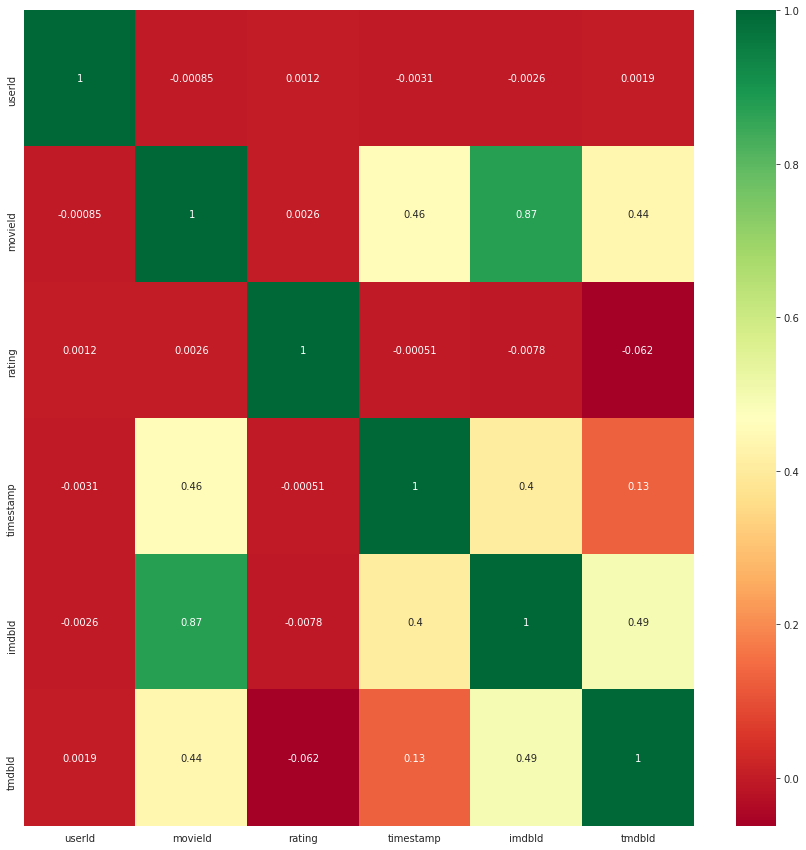

In [0]:
plt.figure(figsize=(15,15))
g = sns.heatmap(fulldata.corr(),
                annot=True,cmap="RdYlGn")


plt.show()

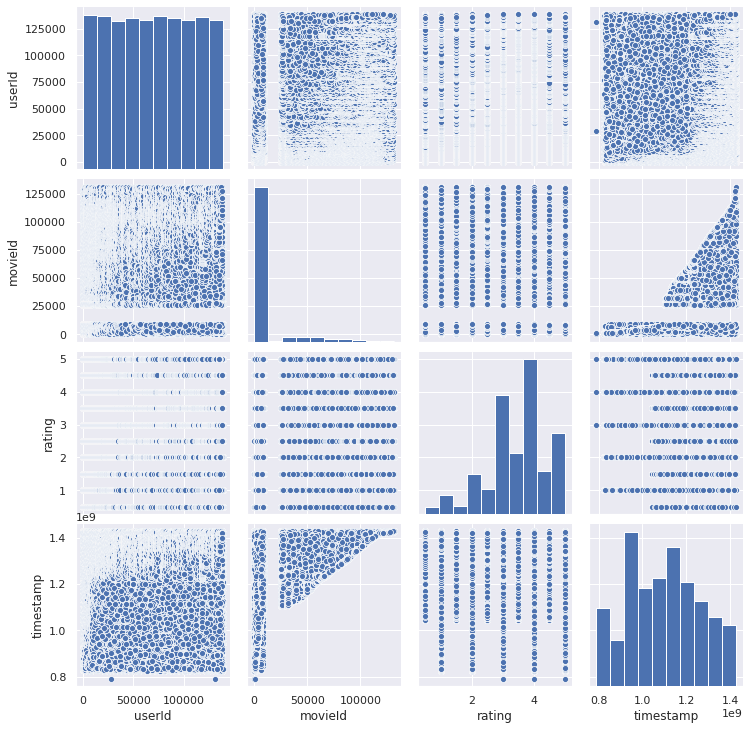

In [0]:
sns.set()
cols = ['userId', 'movieId', 'rating', 'timestamp']
#, 'imdbId', 'tmdbId']
sns.pairplot(fulldata[cols], height = 2.5)
plt.show();

# 6. Simple Recommender System

## 5.1 Dataset configuration

In [0]:
simpledata = data[['movieId', 'rating']]

In [0]:
simpledata.shape

(20000263, 2)

In [0]:
simpledata.head(10)

,movieId,rating
0,2,3.5
1,2,3.0
2,2,3.0
3,2,3.0
4,2,3.0
5,2,3.0
6,2,1.0
7,2,3.5
8,2,2.0
9,2,4.0


In [0]:
ratingnum = pd.DataFrame({'rating_num' : simpledata.groupby( [ "movieId"] ).size()}).reset_index()

In [17]:
ratingnum.head(10)

,movieId,rating_num
0,1,49695
1,2,22243
2,3,12735
3,4,2756
4,5,12161
5,6,23899
6,7,12961
7,8,1415
8,9,3960
9,10,29005


In [0]:
ratingnum.shape

(26744, 2)

In [0]:
g1 = []
g1 = simpledata.groupby( [ "movieId"] ).agg({'mean'})
g1.head(10)

In [0]:
ratingnum = ratingnum.merge(g1, on='movieId')

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [0]:
ratingnum.head(10)

,movieId,rating_num,"(rating, mean)"
0,1,49695,3.921240
1,2,22243,3.211977
2,3,12735,3.151040
3,4,2756,2.861393
4,5,12161,3.064592
5,6,23899,3.834930
6,7,12961,3.366484
7,8,1415,3.142049
8,9,3960,3.004924
9,10,29005,3.430029


In [0]:
simpledata = ratingnum
simpledata.head(10)

,movieId,rating_num,"(rating, mean)"
0,1,49695,3.921240
1,2,22243,3.211977
2,3,12735,3.151040
3,4,2756,2.861393
4,5,12161,3.064592
5,6,23899,3.834930
6,7,12961,3.366484
7,8,1415,3.142049
8,9,3960,3.004924
9,10,29005,3.430029


In [0]:
simpledata.to_csv('simpledata.csv', index=False)

## 5.2 Weighted Rating

Taking these shortcomings into consideration, you must come up with a weighted rating that takes into account the average rating and the number of votes it has accumulated. Such a system will make sure that a movie with a 9 rating from 100,000 voters gets a (far) higher score than a movie with the same rating but a mere few hundred voters.

WeightedRating(WR)=(v/(v+m)⋅R)+(m(v+m)⋅C)

In the above equation,

    v is the number of votes for the movie;

    m is the minimum votes required to be listed in the chart;

    R is the average rating of the movie;

    C is the mean vote across the whole report.


In [18]:
simpledata = pd.read_csv('simpledata.csv', low_memory=False)
simpledata.head(10)

,movieId,rating_num,rating_avg
0,1,49695,3.921240
1,2,22243,3.211977
2,3,12735,3.151040
3,4,2756,2.861393
4,5,12161,3.064592
5,6,23899,3.834930
6,7,12961,3.366484
7,8,1415,3.142049
8,9,3960,3.004924
9,10,29005,3.430029


In [19]:
# Calculate mean of vote average column
C = simpledata['rating_avg'].mean()
print(C)

3.13319999012483


In [20]:
#Minimum votes required to be listed in the chart
m = simpledata['rating_num'].quantile(0.90)
print(m)

1305.7000000000007


In [21]:
#Filter out all qualified movies into a new DataFrame
q_movies = simpledata.copy().loc[simpledata['rating_num'] >= m]
q_movies.shape

(2675, 3)

In [22]:
simpledata.shape

(26744, 3)

In [0]:
# Function that computes the weighted rating of each movie
def weighted_rating(x, m=m, C=C):
    v = x['rating_num']
    R = x['rating_avg']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [0]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

## 5.3 Simple Recommender Result

In [0]:
q_movies = q_movies.merge(movies, on='movieId')

In [0]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 20 movies
q_movies[['movieId', 'title', 'rating_num', 'rating_avg', 'score']].head(20)

,movieId,title,rating_num,rating_avg,score
195,318,"Shawshank Redemption, The (1994)",63366,4.446991,4.420466
439,858,"Godfather, The (1972)",41355,4.364732,4.327039
43,50,"Usual Suspects, The (1995)",47006,4.334372,4.301909
313,527,Schindler's List (1993),50054,4.310175,4.280253
630,1221,"Godfather: Part II, The (1974)",27398,4.275641,4.223672
604,1193,One Flew Over the Cuckoo's Nest (1975),29932,4.248079,4.201478
460,912,Casablanca (1942),24349,4.258327,4.201063
1415,2959,Fight Club (1999),40106,4.227123,4.192632
453,904,Rear Window (1954),17449,4.271334,4.192097
401,750,Dr. Strangelove or: How I Learned to Stop Worr...,23220,4.247287,4.187975


In [0]:
def evaluate_RMSE(rating_avg, score):
  import math
  from sklearn.metrics import mean_squared_error

  RMSE = math.sqrt(mean_squared_error(score, rating_avg))
  print(f'Root Mean Square Error -->{RMSE}')

In [0]:
evaluate_RMSE(q_movies['rating_avg'], q_movies['score'])

Root Mean Square Error -->0.1640892271439859


In [0]:
def evaluate_recall(rating_avg, score):
  import math
  from sklearn.metrics import recall_score

  real_label = []
  pred_label = []
  for rating in rating_avg:
    if rating > 3 : 
      real_label.append(1)
    else:
      real_label.append(0)
  
  for rating in score:
    if rating > 3 : 
      pred_label.append(1)
    else:
      pred_label.append(0) 
  
  recall = recall_score(real_label, pred_label)
  print(f'Recall -->{recall}')

In [26]:
evaluate_recall(q_movies['rating_avg'], q_movies['score'])

Recall -->1.0


# 7. Content based Recommender System

## 7.1 Dataset configuration

### 7.1.1 Content Data

In [0]:
data.head()

,userId,movieId,rating,title,genres,tag,timestamp
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,Mark Waters,1112486027
1,5,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,dark hero,851527569
2,13,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,dark hero,849082742
3,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,noir thriller,835562174
4,34,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,dark hero,846509384


In [0]:
contentdata = data[['movieId', 'title', 'genres']]
contentdata.head()

,movieId,title,genres
0,2,Jumanji (1995),Adventure|Children|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,2,Jumanji (1995),Adventure|Children|Fantasy
3,2,Jumanji (1995),Adventure|Children|Fantasy
4,2,Jumanji (1995),Adventure|Children|Fantasy


In [0]:
contentdata.shape

(20000263, 3)

In [0]:
contentdata = contentdata.drop_duplicates()
contentdata.sort_values(by=['movieId'])
contentdata.head()

,movieId,title,genres
0,2,Jumanji (1995),Adventure|Children|Fantasy
22243,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
30763,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
75743,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
118992,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [0]:
contentdata.shape

(26744, 3)

In [0]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", " ")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", " "))
        else:
            return ''

In [0]:
# Apply clean_data function to your features.
features = ['genres']

for feature in features:
    contentdata[feature] = contentdata[feature].apply(clean_data)

In [0]:
contentdata.head()

,movieId,title,genres
0,2,Jumanji (1995),adventure|children|fantasy
22243,29,"City of Lost Children, The (Cité des enfants p...",adventure|drama|fantasy|mystery|sci-fi
30763,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),mystery|sci-fi|thriller
75743,47,Seven (a.k.a. Se7en) (1995),mystery|thriller
118992,50,"Usual Suspects, The (1995)",crime|mystery|thriller


In [0]:
contentdata.to_csv('contentdata.csv', index=False)

In [0]:
contentdata = pd.read_csv('contentdata.csv', low_memory=False)
contentdata.head(10)

,movieId,title,genres
0,2,Jumanji (1995),adventure children fantasy
1,29,"City of Lost Children, The (Cité des enfants p...",adventure drama fantasy mystery sci-fi
2,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),mystery sci-fi thriller
3,47,Seven (a.k.a. Se7en) (1995),mystery thriller
4,50,"Usual Suspects, The (1995)",crime mystery thriller
5,112,Rumble in the Bronx (Hont faan kui) (1995),action adventure comedy crime
6,151,Rob Roy (1995),action drama romance war
7,223,Clerks (1994),comedy
8,253,Interview with the Vampire: The Vampire Chroni...,drama horror
9,260,Star Wars: Episode IV - A New Hope (1977),action adventure sci-fi


### 7.1.2 Tags Data

In [0]:
tagsdata = data[['movieId', 'title', 'tag']]
tagsdata.head()

,movieId,title,tag
0,2,Jumanji (1995),Mark Waters
1,2,Jumanji (1995),dark hero
2,2,Jumanji (1995),dark hero
3,2,Jumanji (1995),noir thriller
4,2,Jumanji (1995),dark hero


In [0]:
tagsdata = tagsdata.drop_duplicates()

In [0]:
del tagsdata['title']

In [0]:
tagsdata.head()

,movieId,tag
0,2,Mark Waters
1,2,dark hero
3,2,noir thriller
5,2,bollywood
6,2,screwball comedy


In [0]:
tagsdata.shape

(124677, 2)

In [0]:
tagsdata['movieId'] = tagsdata['movieId'].astype('str')
tagsdata['tag'] = tagsdata['tag'].astype('str')

In [0]:
tagsdata['tag'] = tagsdata[['movieId','tag']].groupby(['movieId'])['tag'].transform(lambda x: ' '.join(x))
tagsdata = tagsdata[['movieId','tag']].drop_duplicates()

In [0]:
tagsdata.head(10)

,movieId,tag
0,2,Mark Waters dark hero noir thriller bollywood ...
22243,29,Roman Polanski Biopic Tim Burton based on true...
30763,32,sequel adapted from:book based on a book chees...
75743,47,psychology dark stylized visually appealing no...
118992,50,tedious gangsters London organized crime unpre...
165998,112,Albert Dupontel Action break-up Catherine Zeta...
177888,151,call center comedy culture clash culture shock...
190504,223,Tom Cruise classic disturbing horror John Carp...
214199,253,bittersweet great acting Paul Newman Robert Re...
241767,260,Masahiro Hosoda Juan José Campanella Wesley Ru...


In [0]:
tagsdata.shape

(26744, 2)

In [0]:
tagsdata["tag"] = tagsdata["tag"].str.lower()

In [0]:
tagsdata.head(10)

,movieId,tag
0,2,mark waters dark hero noir thriller bollywood ...
22243,29,roman polanski biopic tim burton based on true...
30763,32,sequel adapted from:book based on a book chees...
75743,47,psychology dark stylized visually appealing no...
118992,50,tedious gangsters london organized crime unpre...
165998,112,albert dupontel action break-up catherine zeta...
177888,151,call center comedy culture clash culture shock...
190504,223,tom cruise classic disturbing horror john carp...
214199,253,bittersweet great acting paul newman robert re...
241767,260,masahiro hosoda juan josé campanella wesley ru...


In [0]:
tagsdata.to_csv('tagsdata.csv', index=False)

In [0]:
tagsdata = pd.read_csv('tagsdata.csv', low_memory=False)
tagsdata.head(10)

,movieId,tag
0,2,mark waters dark hero noir thriller bollywood ...
1,29,roman polanski biopic tim burton based on true...
2,32,sequel adapted from:book based on a book chees...
3,47,psychology dark stylized visually appealing no...
4,50,tedious gangsters london organized crime unpre...
5,112,albert dupontel action break-up catherine zeta...
6,151,call center comedy culture clash culture shock...
7,223,tom cruise classic disturbing horror john carp...
8,253,bittersweet great acting paul newman robert re...
9,260,masahiro hosoda juan josé campanella wesley ru...


### 7.1.3 Soup Data

In [0]:
contentdata.head(10)

,movieId,title,genres
0,2,Jumanji (1995),adventure children fantasy
1,29,"City of Lost Children, The (Cité des enfants p...",adventure drama fantasy mystery sci-fi
2,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),mystery sci-fi thriller
3,47,Seven (a.k.a. Se7en) (1995),mystery thriller
4,50,"Usual Suspects, The (1995)",crime mystery thriller
5,112,Rumble in the Bronx (Hont faan kui) (1995),action adventure comedy crime
6,151,Rob Roy (1995),action drama romance war
7,223,Clerks (1994),comedy
8,253,Interview with the Vampire: The Vampire Chroni...,drama horror
9,260,Star Wars: Episode IV - A New Hope (1977),action adventure sci-fi


In [0]:
tagsdata.head(10)

,movieId,tag
0,2,mark waters dark hero noir thriller bollywood ...
1,29,roman polanski biopic tim burton based on true...
2,32,sequel adapted from:book based on a book chees...
3,47,psychology dark stylized visually appealing no...
4,50,tedious gangsters london organized crime unpre...
5,112,albert dupontel action break-up catherine zeta...
6,151,call center comedy culture clash culture shock...
7,223,tom cruise classic disturbing horror john carp...
8,253,bittersweet great acting paul newman robert re...
9,260,masahiro hosoda juan josé campanella wesley ru...


In [0]:
contentdata['movieId'] = contentdata['movieId'].astype('int')
tagsdata['movieId'] = tagsdata['movieId'].astype('int')

In [0]:
soupdata =[]
soupdata = contentdata.merge(tagsdata, on='movieId')
soupdata.head(10)

,index,movieId,title,genres,tag
0,0,2,Jumanji (1995),adventure children fantasy,mark waters dark hero noir thriller bollywood ...
1,1,29,"City of Lost Children, The (Cité des enfants p...",adventure drama fantasy mystery sci-fi,roman polanski biopic tim burton based on true...
2,2,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),mystery sci-fi thriller,sequel adapted from:book based on a book chees...
3,3,47,Seven (a.k.a. Se7en) (1995),mystery thriller,psychology dark stylized visually appealing no...
4,4,50,"Usual Suspects, The (1995)",crime mystery thriller,tedious gangsters london organized crime unpre...
5,5,112,Rumble in the Bronx (Hont faan kui) (1995),action adventure comedy crime,albert dupontel action break-up catherine zeta...
6,6,151,Rob Roy (1995),action drama romance war,call center comedy culture clash culture shock...
7,7,223,Clerks (1994),comedy,tom cruise classic disturbing horror john carp...
8,8,253,Interview with the Vampire: The Vampire Chroni...,drama horror,bittersweet great acting paul newman robert re...
9,9,260,Star Wars: Episode IV - A New Hope (1977),action adventure sci-fi,masahiro hosoda juan josé campanella wesley ru...


In [0]:
soupdata.to_csv('soupdata.csv', index=False)

In [0]:
soupdata = pd.read_csv('soupdata.csv', low_memory=False)
soupdata.head(10)

,movieId,title,genres,tag
0,2,Jumanji (1995),adventure children fantasy,mark waters dark hero noir thriller bollywood ...
1,29,"City of Lost Children, The (Cité des enfants p...",adventure drama fantasy mystery sci-fi,roman polanski biopic tim burton based on true...
2,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),mystery sci-fi thriller,sequel adapted from:book based on a book chees...
3,47,Seven (a.k.a. Se7en) (1995),mystery thriller,psychology dark stylized visually appealing no...
4,50,"Usual Suspects, The (1995)",crime mystery thriller,tedious gangsters london organized crime unpre...
5,112,Rumble in the Bronx (Hont faan kui) (1995),action adventure comedy crime,albert dupontel action break-up catherine zeta...
6,151,Rob Roy (1995),action drama romance war,call center comedy culture clash culture shock...
7,223,Clerks (1994),comedy,tom cruise classic disturbing horror john carp...
8,253,Interview with the Vampire: The Vampire Chroni...,drama horror,bittersweet great acting paul newman robert re...
9,260,Star Wars: Episode IV - A New Hope (1977),action adventure sci-fi,masahiro hosoda juan josé campanella wesley ru...


##7.2 Cosine Similarity using content data (Genres)

The create_soup function will simply join all the required columns by a space. This is the final preprocessing step, and the output of this function will be fed into the word vector model.

In [0]:
contentdata.head(10)

,movieId,title,genres
0,2,Jumanji (1995),adventure children fantasy
1,29,"City of Lost Children, The (Cité des enfants p...",adventure drama fantasy mystery sci-fi
2,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),mystery sci-fi thriller
3,47,Seven (a.k.a. Se7en) (1995),mystery thriller
4,50,"Usual Suspects, The (1995)",crime mystery thriller
5,112,Rumble in the Bronx (Hont faan kui) (1995),action adventure comedy crime
6,151,Rob Roy (1995),action drama romance war
7,223,Clerks (1994),comedy
8,253,Interview with the Vampire: The Vampire Chroni...,drama horror
9,260,Star Wars: Episode IV - A New Hope (1977),action adventure sci-fi


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(contentdata['genres'])

In [0]:
count_matrix.shape

(26744, 22)

In [0]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [0]:
# Reset index of your main DataFrame and construct reverse mapping as before
contentdata = contentdata.reset_index()
indices = pd.Series(contentdata.index, index=contentdata['title'])

In [0]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return contentdata['title'].iloc[movie_indices]

In [0]:
get_recommendations('Jumanji (1995)', cosine_sim)

21                        Escape to Witch Mountain (1975)
126     Harry Potter and the Sorcerer's Stone (a.k.a. ...
308                                   Return to Oz (1985)
388                    Indian in the Cupboard, The (1995)
929     Chronicles of Narnia: The Lion, the Witch and ...
1099                        NeverEnding Story, The (1984)
1185          Water Horse: Legend of the Deep, The (2007)
1797                           Golden Compass, The (2007)
1804     Chronicles of Narnia: Prince Caspian, The (2008)
2294                        Santa Claus: The Movie (1985)
Name: title, dtype: object

In [0]:
get_recommendations('Star Wars: Episode IV - A New Hope (1977)', cosine_sim)

30     Star Wars: Episode V - The Empire Strikes Back...
82      Star Wars: Episode I - The Phantom Menace (1999)
129                                  Flash Gordon (1980)
136                             Time Machine, The (2002)
186    Star Wars: Episode VI - Return of the Jedi (1983)
216                 Road Warrior, The (Mad Max 2) (1981)
226                             Time Machine, The (1960)
233                                      Stargate (1994)
236                                Demolition Man (1993)
281           Star Trek III: The Search for Spock (1984)
Name: title, dtype: object

##7.3 Cosine Similarity using soup data (Genres & Tags)

The create_soup function will simply join all the required columns by a space. This is the final preprocessing step, and the output of this function will be fed into the word vector model.

In [0]:
def create_soup(x):
    return ''.join(x['genres']) + ' ' + ''.join(x['tag'])

In [0]:
# Create a new soup feature
soupdata['soup'] = soupdata.apply(create_soup, axis=1)

In [0]:
soupdata.head(10)

,index,movieId,title,genres,tag,soup
0,0,2,Jumanji (1995),adventure children fantasy,mark waters dark hero noir thriller bollywood ...,adventure children fantasy mark waters dark he...
1,1,29,"City of Lost Children, The (Cité des enfants p...",adventure drama fantasy mystery sci-fi,roman polanski biopic tim burton based on true...,adventure drama fantasy mystery sci-fi roman p...
2,2,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),mystery sci-fi thriller,sequel adapted from:book based on a book chees...,mystery sci-fi thriller sequel adapted from:bo...
3,3,47,Seven (a.k.a. Se7en) (1995),mystery thriller,psychology dark stylized visually appealing no...,mystery thriller psychology dark stylized visu...
4,4,50,"Usual Suspects, The (1995)",crime mystery thriller,tedious gangsters london organized crime unpre...,crime mystery thriller tedious gangsters londo...
5,5,112,Rumble in the Bronx (Hont faan kui) (1995),action adventure comedy crime,albert dupontel action break-up catherine zeta...,action adventure comedy crime albert dupontel ...
6,6,151,Rob Roy (1995),action drama romance war,call center comedy culture clash culture shock...,action drama romance war call center comedy cu...
7,7,223,Clerks (1994),comedy,tom cruise classic disturbing horror john carp...,comedy tom cruise classic disturbing horror jo...
8,8,253,Interview with the Vampire: The Vampire Chroni...,drama horror,bittersweet great acting paul newman robert re...,drama horror bittersweet great acting paul new...
9,9,260,Star Wars: Episode IV - A New Hope (1977),action adventure sci-fi,masahiro hosoda juan josé campanella wesley ru...,action adventure sci-fi masahiro hosoda juan j...


In [0]:
soupdata.shape

(26744, 5)

In [0]:
soupdata2 = soupdata[soupdata["movieId"] < 8000]
soupdata2.shape

(7610, 5)

In [0]:
soupdata2.head()

,movieId,title,genres,tag,soup
0,2,Jumanji (1995),adventure children fantasy,mark waters dark hero noir thriller bollywood ...,adventure children fantasy mark waters dark he...
1,29,"City of Lost Children, The (Cité des enfants p...",adventure drama fantasy mystery sci-fi,roman polanski biopic tim burton based on true...,adventure drama fantasy mystery sci-fi roman p...
2,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),mystery sci-fi thriller,sequel adapted from:book based on a book chees...,mystery sci-fi thriller sequel adapted from:bo...
3,47,Seven (a.k.a. Se7en) (1995),mystery thriller,psychology dark stylized visually appealing no...,mystery thriller psychology dark stylized visu...
4,50,"Usual Suspects, The (1995)",crime mystery thriller,tedious gangsters london organized crime unpre...,crime mystery thriller tedious gangsters londo...


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(soupdata2['soup'])

In [0]:
count_matrix.shape

(7610, 23863)

In [0]:
print(count_matrix)

  (0, 1)	3
  (0, 7)	1
  (0, 11)	5
  (0, 12)	7
  (0, 15)	2
  (0, 17)	1
  (0, 24)	4
  (0, 28)	1
  (0, 32)	1
  (0, 38)	1
  (0, 41)	1
  (0, 46)	1
  (0, 52)	1
  (0, 59)	1
  (0, 60)	1
  (0, 63)	1
  (0, 64)	1
  (0, 65)	1
  (0, 66)	1
  (0, 67)	1
  (0, 70)	1
  (0, 72)	1
  (0, 73)	1
  (0, 75)	1
  (0, 76)	3
  :	:
  (7598, 14708)	1
  (7598, 21381)	1
  (7599, 6052)	1
  (7599, 14708)	1
  (7600, 6052)	1
  (7600, 14708)	1
  (7601, 14573)	1
  (7601, 14708)	1
  (7602, 6052)	1
  (7602, 14708)	1
  (7603, 4270)	1
  (7603, 14708)	1
  (7604, 4270)	1
  (7604, 14708)	1
  (7605, 6052)	1
  (7605, 14708)	1
  (7606, 6052)	1
  (7606, 14708)	1
  (7607, 4766)	1
  (7607, 6052)	1
  (7607, 14708)	1
  (7608, 5872)	1
  (7608, 14708)	1
  (7609, 5872)	1
  (7609, 14708)	1


In [0]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [0]:
# Reset index of your main DataFrame and construct reverse mapping as before
soupdata2 = soupdata2.reset_index()
indices = pd.Series(soupdata2.index, index=soupdata2['title'])

In [0]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return soupdata2['title'].iloc[movie_indices]

In [0]:
soupdata2.head(10)

,index,movieId,title,genres,tag,soup
0,0,2,Jumanji (1995),adventure children fantasy,mark waters dark hero noir thriller bollywood ...,adventure children fantasy mark waters dark he...
1,1,29,"City of Lost Children, The (Cité des enfants p...",adventure drama fantasy mystery sci-fi,roman polanski biopic tim burton based on true...,adventure drama fantasy mystery sci-fi roman p...
2,2,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),mystery sci-fi thriller,sequel adapted from:book based on a book chees...,mystery sci-fi thriller sequel adapted from:bo...
3,3,47,Seven (a.k.a. Se7en) (1995),mystery thriller,psychology dark stylized visually appealing no...,mystery thriller psychology dark stylized visu...
4,4,50,"Usual Suspects, The (1995)",crime mystery thriller,tedious gangsters london organized crime unpre...,crime mystery thriller tedious gangsters londo...
5,5,112,Rumble in the Bronx (Hont faan kui) (1995),action adventure comedy crime,albert dupontel action break-up catherine zeta...,action adventure comedy crime albert dupontel ...
6,6,151,Rob Roy (1995),action drama romance war,call center comedy culture clash culture shock...,action drama romance war call center comedy cu...
7,7,223,Clerks (1994),comedy,tom cruise classic disturbing horror john carp...,comedy tom cruise classic disturbing horror jo...
8,8,253,Interview with the Vampire: The Vampire Chroni...,drama horror,bittersweet great acting paul newman robert re...,drama horror bittersweet great acting paul new...
9,9,260,Star Wars: Episode IV - A New Hope (1977),action adventure sci-fi,masahiro hosoda juan josé campanella wesley ru...,action adventure sci-fi masahiro hosoda juan j...


In [0]:
get_recommendations('Jumanji (1995)', cosine_sim)

12                     Shawshank Redemption, The (1994)
2             Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
3                           Seven (a.k.a. Se7en) (1995)
9             Star Wars: Episode IV - A New Hope (1977)
11                                  Pulp Fiction (1994)
4                            Usual Suspects, The (1995)
7                                         Clerks (1994)
5            Rumble in the Bronx (Hont faan kui) (1995)
13                   What's Eating Gilbert Grape (1993)
10    Léon: The Professional (a.k.a. The Professiona...
Name: title, dtype: object

In [0]:
get_recommendations('Star Wars: Episode IV - A New Hope (1977)', cosine_sim)

3                           Seven (a.k.a. Se7en) (1995)
11                                  Pulp Fiction (1994)
2             Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
4                            Usual Suspects, The (1995)
12                     Shawshank Redemption, The (1994)
13                   What's Eating Gilbert Grape (1993)
10    Léon: The Professional (a.k.a. The Professiona...
5            Rumble in the Bronx (Hont faan kui) (1995)
1     City of Lost Children, The (Cité des enfants p...
8     Interview with the Vampire: The Vampire Chroni...
Name: title, dtype: object